In [141]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [31]:
pca_data = np.genfromtxt('pca_dataset.txt', delimiter=' ')

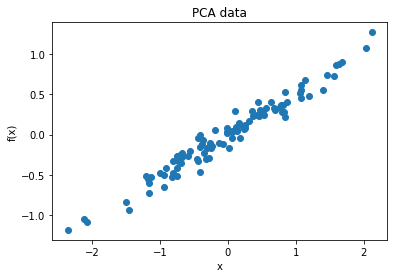

In [67]:
fig,ax = plt.subplots(1)

ax.set_title("PCA data")
ax.scatter(pca_data[:,0], pca_data[:,1])
ax.set_ylabel('f(x)')
ax.set_xlabel('x')

plt.show()

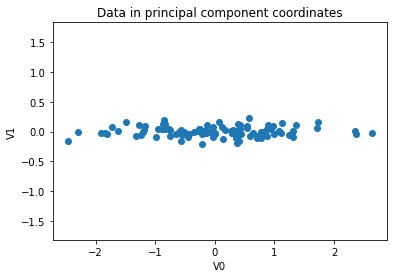

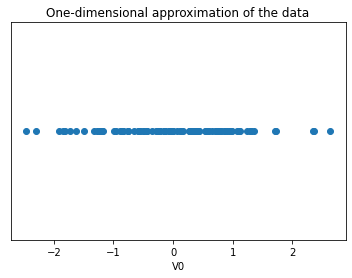

Energy of the first principal component: 9.943404944386828
Energy of the second principal component: 0.8262420091547042
Percentage of the total energy explained by using only the first principal component: 0.9931426561434291
Percentage of the total energy explained by using only the second principal component: 0.006857343856570884


In [130]:
# PCA

# Form the data matrix
pca_data = np.genfromtxt('pca_dataset.txt', delimiter=' ')

# Center matrix
data_mean = np.mean(pca_data, axis=0)
pca_data = pca_data - data_mean

# Decompose into singular vectors
u, s, vh = np.linalg.svd(pca_data)

# Calculate principal component cooridanates
pc_coordinates = np.dot(pca_data,np.transpose(vh))

# Plot data in principal component coordinates
fig,ax = plt.subplots(1)

ax.set_title("Data in principal component coordinates")
ax.scatter(pc_coordinates[:,0], pc_coordinates[:,1])
ax.set_ylabel('V1')
ax.set_xlabel('V0')

plt.axis('equal')
plt.show()

# Approximated one-dimensional subspace of the data would consist of only the first principal component.
# That is basically points on a single line.
# Plot one-dimensional approximation
fig,ax = plt.subplots(1)

ax.set_title("One-dimensional approximation of the data")
ax.scatter(pc_coordinates[:,0],np.zeros(pc_coordinates[:,0].shape))
ax.set_xlabel('V0')
ax.axes.get_yaxis().set_visible(False)

plt.show()

# Energy contained in principal components
print("Energy of the first principal component: {}".format(s[0]))
print("Energy of the second principal component: {}".format(s[1]))
print("Percentage of the total energy explained by using only the first principal component: {}".format(s[0]**2/(s[0]**2+s[1]**2)))
print("Percentage of the total energy explained by using only the second principal component: {}".format(s[1]**2/(s[0]**2+s[1]**2)))


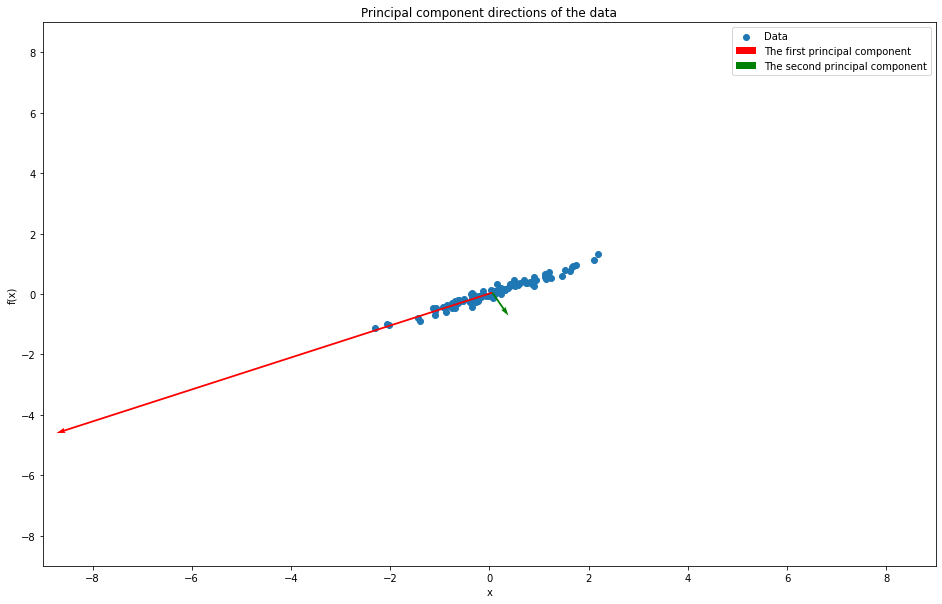

In [133]:
# plot two principal components on the data

pca_data = np.genfromtxt('pca_dataset.txt', delimiter=' ')

fig,ax = plt.subplots(1)

fig.set_size_inches(16, 10)

ax.set_title("Principal component directions of the data")
ax.scatter(pca_data[:,0], pca_data[:,1], label="Data")
length_0 = np.sqrt((vh[0][0] - data_mean[0])**2 + (vh[0][1] - data_mean[1])**2)
length_1 = np.sqrt((vh[1][0] - data_mean[0])**2 + (vh[1][1] - data_mean[1])**2)

ax.quiver([data_mean[0]],[data_mean[1]],[(vh[0][0]-data_mean[0])*s[0]/length_0],[(vh[0][1]-data_mean[1])*s[0]/length_0],
          angles='xy', scale_units='xy', scale=1, width=0.002, color='r', label="The first principal component")
ax.quiver([data_mean[0]],[data_mean[1]],[(vh[1][0]-data_mean[0])*s[1]/length_1],[(vh[1][1]-data_mean[1])*s[1]/length_1],
          angles='xy', scale_units='xy', scale=1, width=0.002, color='g', label="The second principal component")

ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.set_ylim(-9,9)
ax.set_xlim(-9,9)

plt.legend()
plt.show()